In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
## traingng data
data = pd.read_csv('training_data.csv')

# target data
data['Price'] = pd.read_csv('training_data_targets.csv', header=None)

data.describe(include = 'all')

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5417,5417,5417.000000,5.417000e+03,5417,5417,5417,5416,5383,5383,5379.000000,5417.000000
unique,1787,11,NaN,NaN,5,2,4,435,145,364,NaN,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,NaN
freq,43,706,NaN,NaN,2876,3890,4431,159,551,213,NaN,NaN
mean,NaN,NaN,2013.363670,5.882682e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.280350,9.453670
std,NaN,NaN,3.283659,9.511826e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811459,11.166658
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.500000
50%,NaN,NaN,2014.000000,5.329300e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.650000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,9.900000


In [3]:
data.isnull().sum()

Brand                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine               34
Power                34
Seats                38
Price                 0
dtype: int64

In [4]:
# having just the company name for the column 'Brand'
for i in range(len(data['Brand'])):
    brand = data['Brand'][i]
    name = brand.split()
    data['Brand'][i] = data['Brand'][i].replace(brand, name[0])


# ## removing units from mileage, Engine, power
for i in range(len(data['Mileage'])):
    if type(data['Mileage'][i]) == float:  ## to skip null values
        continue
    else:
        brand = data['Mileage'][i]
        name = brand.split(" ")
        data['Mileage'][i] = data['Mileage'][i].replace(brand, name[0])

for i in range(len(data['Engine'])):
    if type(data['Engine'][i]) == float:
        continue
    else:
        brand = data['Engine'][i]
        name = brand.split()
        data['Engine'][i] = data['Engine'][i].replace(brand, name[0])

for i in range(len(data['Power'])):
    if type(data['Power'][i]) == float:
        continue
    else:
        brand = data['Power'][i]
        name = brand.split()
        data['Power'][i] = data['Power'][i].replace(brand, name[0])

In [5]:
data.describe(include = 'all')

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5417,5417,5417.000000,5.417000e+03,5417,5417,5417,5416,5383,5383,5379.000000,5417.000000
unique,29,11,NaN,NaN,5,2,4,425,145,364,NaN,NaN
top,Maruti,Mumbai,NaN,NaN,Diesel,Manual,First,17.0,1197,74,NaN,NaN
freq,1097,706,NaN,NaN,2876,3890,4431,160,551,213,NaN,NaN
mean,NaN,NaN,2013.363670,5.882682e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.280350,9.453670
std,NaN,NaN,3.283659,9.511826e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811459,11.166658
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.500000
50%,NaN,NaN,2014.000000,5.329300e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.650000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,9.900000


In [6]:
## converting 'seats' to a discrete type format
# filling missing values of Seats
data['Seats'].fillna(data['Seats'].median(), inplace = True)
data['Seats'] = data['Seats'].astype(str)
# data['Year'] = data['Year'].astype(str) # reagrding year as a continuous type for now.

## converting 'Mileage', 'Engine', 'Power' to continuous type format
data['Mileage'] = data['Mileage'].astype(float)

data['Engine'] = data['Engine'].astype(float)

for i in range(len(data['Power'])):
    try:
        data['Power'][i] = data['Power'][i].astype(float)
    except:
        if data['Power'][i] == 'null':
            data['Power'][i] = None

data['Power'] = data['Power'].astype(float)

In [7]:
data.describe(include = 'all')

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5417,5417,5417.000000,5.417000e+03,5417,5417,5417,5416.000000,5383.000000,5288.000000,5417,5417.000000
unique,29,11,NaN,NaN,5,2,4,NaN,NaN,NaN,9,NaN
top,Maruti,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,5.0,NaN
freq,1097,706,NaN,NaN,2876,3890,4431,NaN,NaN,NaN,4544,NaN
mean,NaN,NaN,2013.363670,5.882682e+04,NaN,NaN,NaN,18.148545,1620.775218,113.088034,NaN,9.453670
std,NaN,NaN,3.283659,9.511826e+04,NaN,NaN,NaN,4.554510,602.809364,54.004647,NaN,11.166658
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.170000,1197.000000,75.940000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.329300e+04,NaN,NaN,NaN,18.160000,1493.000000,97.700000,NaN,5.650000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1973.500000,138.100000,NaN,9.900000


### Dealing with missing values

> Missing values are present in Mileage, engine, power

> to fill these, I am using median, as it will prevent any case of outliers

In [8]:
# using .fillna() to fill the missing values

data['Mileage'].fillna(data['Mileage'].median(), inplace = True)
data['Engine'].fillna(data['Engine'].median(), inplace = True)
data['Power'].fillna(data['Power'].median(), inplace = True)
data.describe(include = 'all')

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5417,5417,5417.000000,5.417000e+03,5417,5417,5417,5417.000000,5417.000000,5417.000000,5417,5417.000000
unique,29,11,NaN,NaN,5,2,4,NaN,NaN,NaN,9,NaN
top,Maruti,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,5.0,NaN
freq,1097,706,NaN,NaN,2876,3890,4431,NaN,NaN,NaN,4544,NaN
mean,NaN,NaN,2013.363670,5.882682e+04,NaN,NaN,NaN,18.148547,1619.973232,112.721585,NaN,9.453670
std,NaN,NaN,3.283659,9.511826e+04,NaN,NaN,NaN,4.554090,600.998998,53.409188,NaN,11.166658
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.170000,1198.000000,78.000000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.329300e+04,NaN,NaN,NaN,18.160000,1493.000000,97.700000,NaN,5.650000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1968.000000,138.030000,NaN,9.900000


### Dealing and Checking Outliers

> We are going to plot only continuous type variables to check outliers

> if they are present, replace them with median , check using IQR method.

> IQR = Inter Quartile Range

In [9]:
conti_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']
# price is our target varibale, so we are not going to replace any values in it, for now.

In [10]:
def handle_outliers_iqr(df, continuous_columns, thresh = 1.5):
    for column in continuous_columns:
        # Calculate IQR for the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - thresh * IQR
        upper_bound = Q3 + thresh * IQR

        # Identify and handle outliers
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        df.loc[outliers, column] = df[column].median()  # Replace outliers with the median

    return df

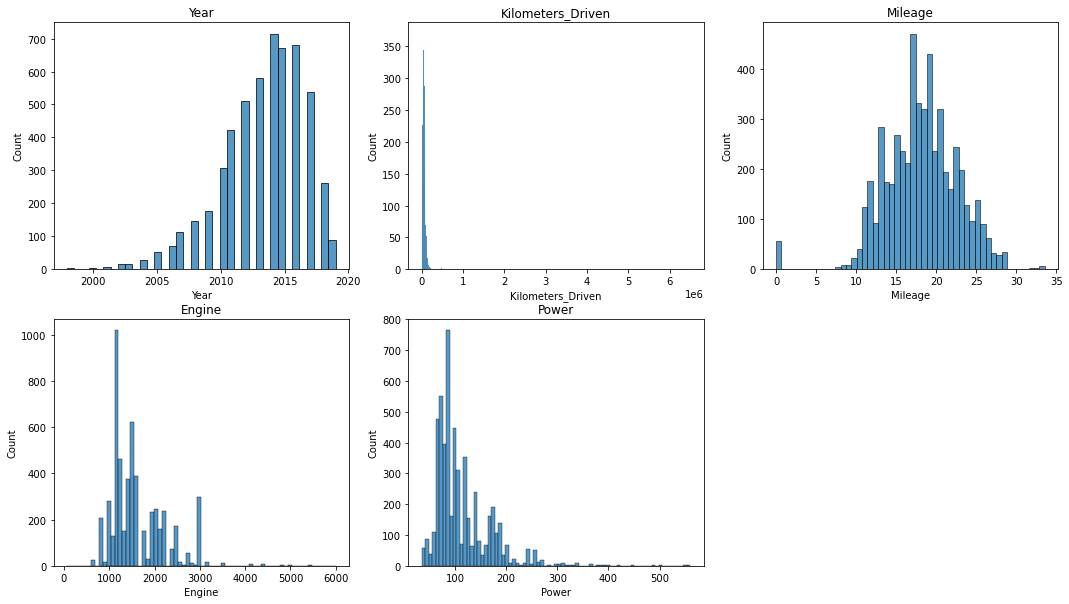

In [11]:
# plotting variable before removing outliers

plt.figure(figsize = (18, 10))

for i in range(len(conti_features)):
  plt.subplot(2, 3, i+1)
  sns.histplot(data[conti_features[i]])
  plt.title(conti_features[i])

plt.show()


In [12]:
# removing outliers from the data
data = handle_outliers_iqr(data, conti_features)

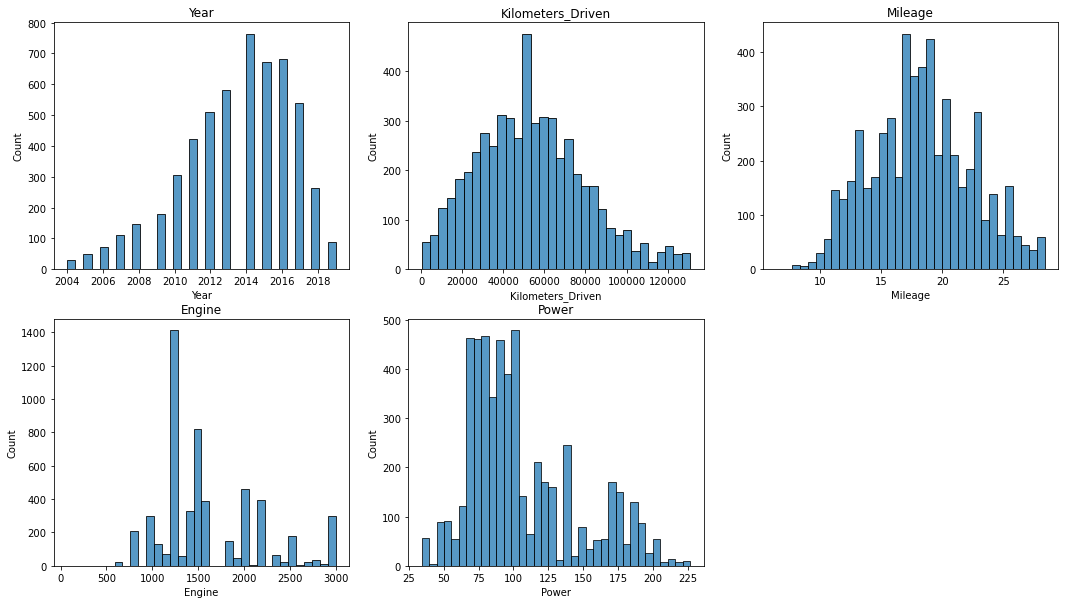

In [13]:
# plotting data after replacing outliers

plt.figure(figsize = (18, 10))

for i in range(len(conti_features)):
  plt.subplot(2, 3, i+1)
  sns.histplot(data[conti_features[i]])
  plt.title(conti_features[i])

plt.show()

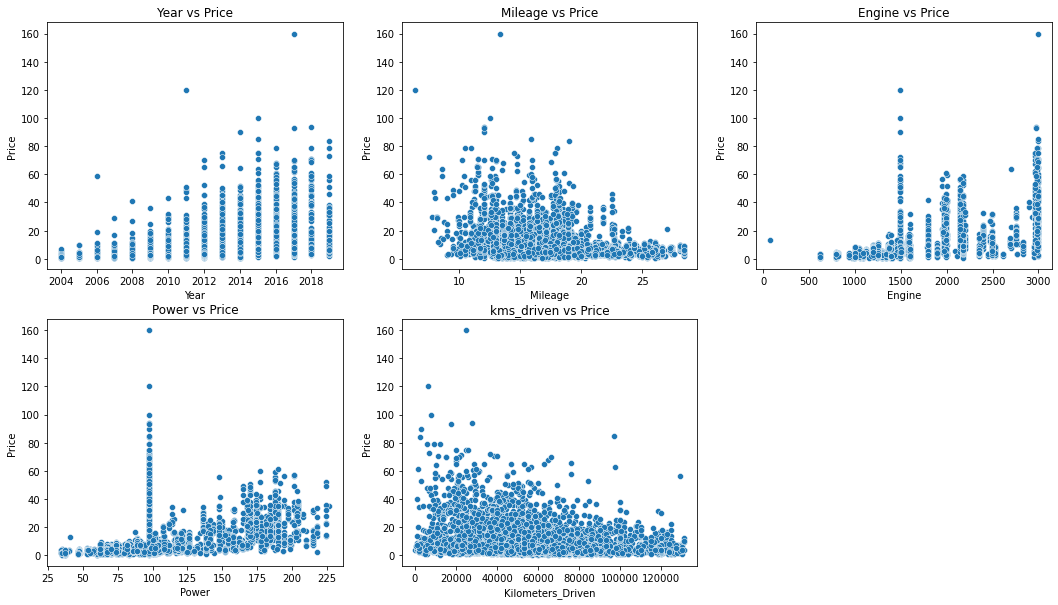

In [14]:
# checking the linearity and relation of price vs conti_features

plt.figure(figsize = (18, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(x = data['Year'], y = data['Price'])
plt.title('Year vs Price')

plt.subplot(2, 3, 2)
sns.scatterplot(x = data['Mileage'], y = data['Price'])
plt.title('Mileage vs Price')

plt.subplot(2, 3, 3)
sns.scatterplot(x = data['Engine'], y = data['Price'])
plt.title('Engine vs Price')

plt.subplot(2, 3, 4)
sns.scatterplot(x = data['Power'], y = data['Price'])
plt.title('Power vs Price')

plt.subplot(2, 3, 5)
sns.scatterplot(x = data['Kilometers_Driven'], y = data['Price'])
plt.title('kms_driven vs Price')

plt.show()

In [15]:
# since relation is not linear, using log transformation on price to make it linear
log_price = np.log(data['Price'])
data['log_price'] = log_price



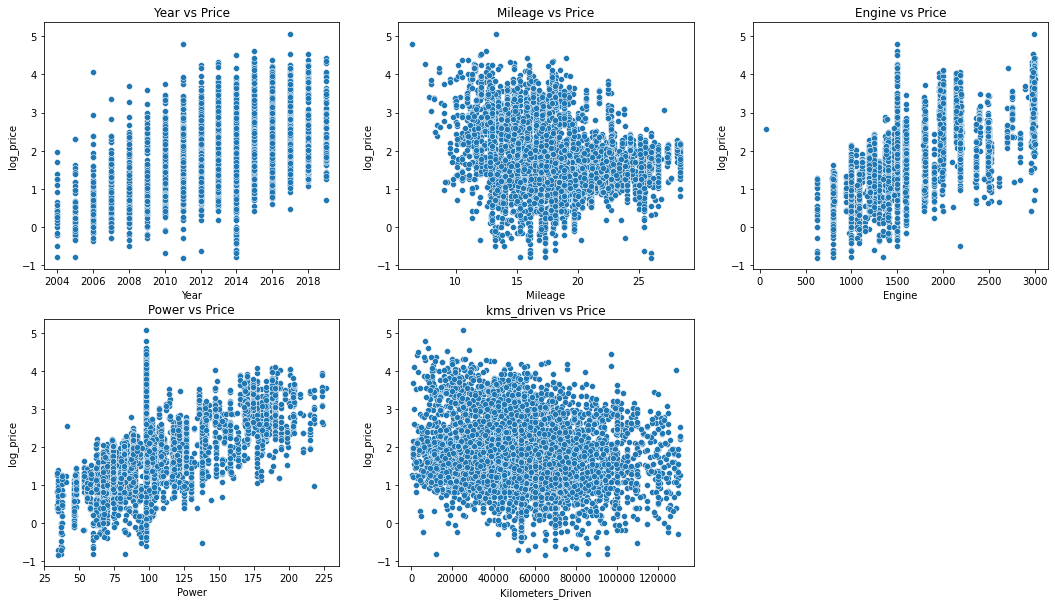

In [16]:
# checking again against log price

plt.figure(figsize = (18, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(x = data['Year'], y = data['log_price'])
plt.title('Year vs Price')

plt.subplot(2, 3, 2)
sns.scatterplot(x = data['Mileage'], y = data['log_price'])
plt.title('Mileage vs Price')

plt.subplot(2, 3, 3)
sns.scatterplot(x = data['Engine'], y = data['log_price'])
plt.title('Engine vs Price')

plt.subplot(2, 3, 4)
sns.scatterplot(x = data['Power'], y = data['log_price'])
plt.title('Power vs Price')

plt.subplot(2, 3, 5)
sns.scatterplot(x = data['Kilometers_Driven'], y = data['log_price'])
plt.title('kms_driven vs Price')

plt.show()

In [17]:
### checking coorelation of elements for the possibility of overfitting

conti_features.append('Price')
corr_mat = data[conti_features].corr()
print(corr_mat)

# if correlation of two features is equal to or close to 1, we can remove the feature
## this is not the case in the given data

                       Year  Kilometers_Driven   Mileage    Engine     Power  \
Year               1.000000          -0.479688  0.293139 -0.057073  0.020308   
Kilometers_Driven -0.479688           1.000000 -0.121144  0.166480  0.059363   
Mileage            0.293139          -0.121144  1.000000 -0.620689 -0.497743   
Engine            -0.057073           0.166480 -0.620689  1.000000  0.686464   
Power              0.020308           0.059363 -0.497743  0.686464  1.000000   
Price              0.295520          -0.182909 -0.331490  0.589943  0.492306   

                      Price  
Year               0.295520  
Kilometers_Driven -0.182909  
Mileage           -0.331490  
Engine             0.589943  
Power              0.492306  
Price              1.000000  


In [18]:
csv_path = os.getcwd()+ '/data.csv'
data.to_csv(csv_path, index = False)